This is a wrap up of bifurcation analysis from the chapter 3 of textbook Strogatz.The goal is to perform bifurcation analysis under Python programing. In chapter 3, Strogatz introduced three types of bifurcations, including:
* Saddle-Node Bifurcation
* Transcritical Bifurcation
* Pitchfolk Bifurcation

The main technique in the context includes:
* solving system of equations to find the bifurcation point.
* plotting implicit functions that represents the bifurcation diagrams
* plotting contour plots and vector fields to show the trajectories of systems

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import brewer2mpl

Populating the interactive namespace from numpy and matplotlib


# Saddle Node Bifurcation

Saddle-node Bifurcations involve the changes of the number of fixed points. When the bifurcation occurs, the number of fixed point changes from 0 to 1 and after the bifurcation the one fixed points divided to two in the system. The example here is the exercise 3.1.1 in the textbook. 

### 1. Graph the ODE

The equation is  
$\dot x = 1 + rx + x^2$

In [2]:
# ODE in Exercise 3.1.1
def f1(x, r):
    return 1 + r*x + x**2

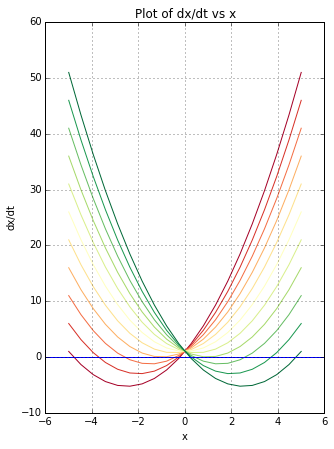

In [3]:
# set seqeunces of x and r
x = linspace(-5, 5, 20)
r = linspace(5, -5, 11)

# line colors
bmap = brewer2mpl.get_map('RdYlGn', 'Diverging', 11)
colors = bmap.mpl_colors

# plot lines
figure(figsize=(5,7))
for idx in range(11):
    plt.plot(x, f1(x, r[idx]), color = colors[idx])

# axis and title
grid(True)
axhline() # the x axis where y = 0
xlabel("x")
ylabel("dx/dt")
title("Plot of dx/dt vs x")

Note that the color of lines represents the value of r. If the line is more reddish, it has larger r (r > 0) and if the line is more greenish, it has smaller r (where r < 0). The yellow line means that r is closed to zero.

### 2. Find the Bifurcation Points

From the plot above, we know that there are two bifurcations points, where the ODE equations intersects with the x-axis (the blue line). Here I will try to find the points symbolically using the package "SymPy".

In [4]:
import sympy as sp
sp.init_printing()

First, declare the variables.

In [5]:
x = sp.Symbol("x")
r = sp.Symbol("r")

Now, let's write down the equations.

$\begin{cases} \dot x = 0 \\ \frac{\dot x}{dx} = 0\end{cases} = \begin{cases} x^2 + rx + 1 = 0 \\ 2x + r = 0\end{cases}$ 

The first line is the equation where the fixed point occurs. The second line of equations is where the x axis is the tagent line of $\dot x$; that is, where the bifurcation occurs.

In [6]:
sp.solve([1 + r * x + x**2, 2*x + r], x, r)

Therefore, now we know the bifurcation occurs at (x = -1, r = 2) and (x = 1, r = -2).

### 3. Bifurcation Diagram

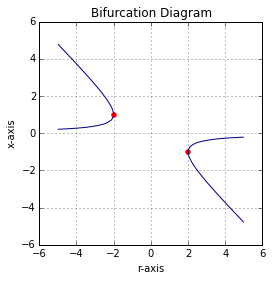

In [7]:
# set pairs of (x, r)
x = linspace(-5, 5, 50)
r = linspace(5, -5, 50)
x, r = meshgrid(x, r)

# contour plot
contour(r, x, f1(x, r), [0])

# axis
grid(True)
axis("scaled")

# labels bifurcation points
plt.scatter([2, -2], [-1, 1], s = 20, color = "red")

# labels and title
xlabel('r-axis')
ylabel('x-axis')
title('Bifurcation Diagram')

Note that I have not yet figured out how to label the stability in the bifurcation diagram.

### 4. Vector Field & Contour Plot

According to the bifurcation diagram, here I draw the vector fields and contour plot with r = -3, -2, 0, 2, 3. The vector field is sketch on the x-t plane.

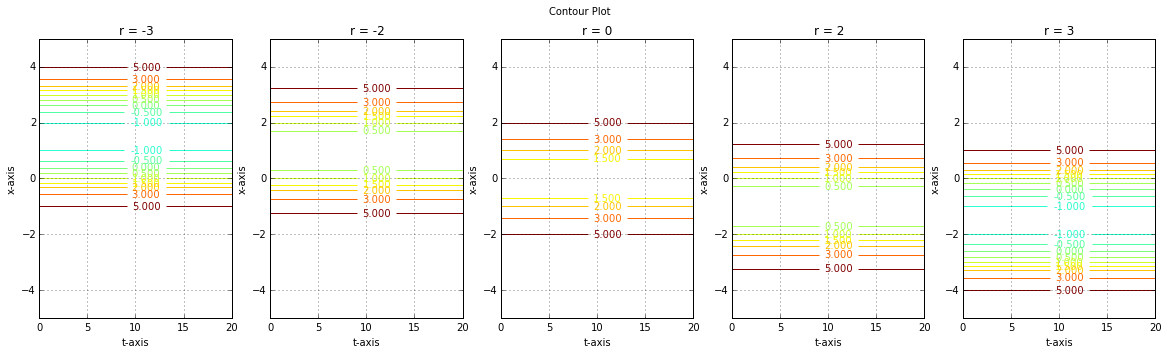

In [8]:
# set parameters
x = linspace(-5, 5, 2000)
t = linspace(0, 20, 10)
x, t = meshgrid(x, t)

r = [-3, -2, 0, 2, 3]


# contour plot
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax = ax.ravel()

for idx in range(5):
    # value of dx/dt
    xdot = f1(x, r[idx])

    # contour plot
    levels = [-5, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3, 5]
    cs = ax[idx].contour(t, x, xdot, levels)
    clabel(cs,inline=1,fontsize=10)

    # axis
    ax[idx].grid(True)

    # labels
    ax[idx].set_xlabel('t-axis')
    ax[idx].set_ylabel('x-axis')
    ax[idx].set_title('r = ' + str(r[idx]))

# title
fig.text(0.5, 0.99, 'Contour Plot', horizontalalignment = 'center', verticalalignment = 'top')

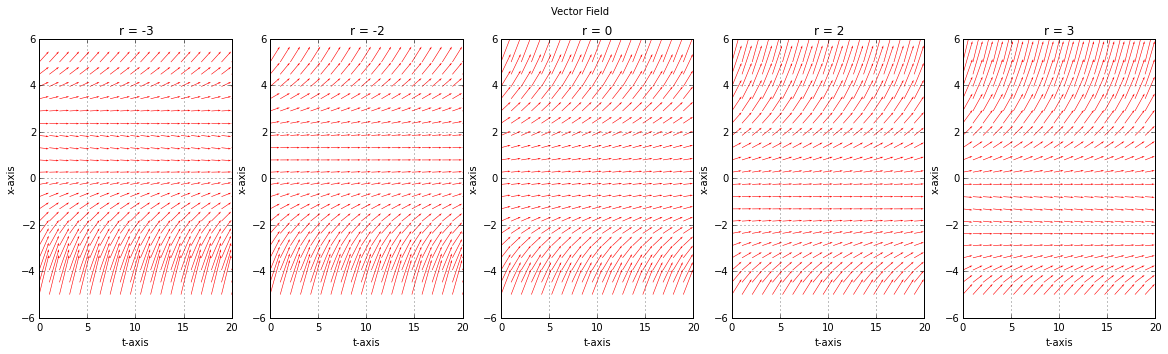

In [9]:
# set parameters
x = linspace(-5, 5, 20)
t = linspace(0, 20, 20)
x, t = meshgrid(x, t)

r = [-3, -2, 0, 2, 3]

# Vector Field
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax = ax.ravel()

for idx in range(5):    
    dx = f1(x, r[idx])
    dt = 10
    ax[idx].quiver(t, x, dt, dx, scale = 200, color = "r")

    # axis
    ax[idx].grid(True)

    # labels
    ax[idx].set_xlabel('t-axis')
    ax[idx].set_ylabel('x-axis')
    ax[idx].set_title('r = ' + str(r[idx]))

# title
fig.text(0.5, 0.99, 'Vector Field', horizontalalignment = 'center', verticalalignment = 'top')

# Transcritical Bifurcation

Let's now move to the transcritical bifurcation. transcriptical bifurcation does not involve the change of the number of fixed points but does involve the change of the stability of fixed points. The following equation is from exercise 3.2.1 in the textbook.

### 1. Graph the ODE

The equations:  
$\dot x = rx + x^2$

In [10]:
# ODE of exercise 3.2.1
def f2(x, r):
    return r*x + x**2

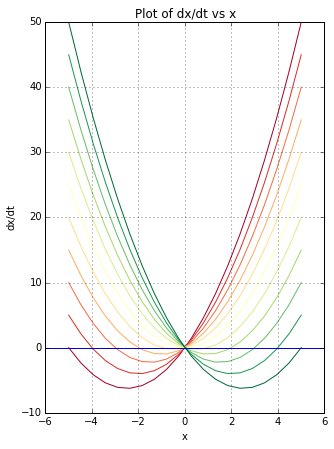

In [11]:
# sequence of x and r
x = linspace(-5, 5, 20)
r = linspace(5, -5, 11)

# line colors
bmap = brewer2mpl.get_map('RdYlGn', 'Diverging', 11)
colors = bmap.mpl_colors

# plot lines
figure(figsize=(5,7))
for idx in range(11):
    plt.plot(x, f2(x, r[idx]), color = colors[idx])

# axis
grid(True)
axhline()
xlabel("x")
ylabel("dx/dt")
title("Plot of dx/dt vs x")

Note that the color os lines represents the value of r. If the line is more reddish, it has larger r (r > 0) and if the line is more greenish, it has smaller r (where r < 0). The yellow line means that r is closed to zero.

### 2. Find the Bifurcation Points

From the graph above, we could observe that no matter what value of r, there is always a fixed point at the origin (0, 0). The only difference is that when r is positive, the origin is an unstable fixed point and when r is negative, the origin is a stable fixed point. Let's try to solve the bifurcation point, which should lead us to x = 0.

In [12]:
x = sp.Symbol("x")
r = sp.Symbol("r")

Now, let's write down the equations.

$\begin{cases} \dot x = 0 \\ \frac{\dot x}{dx} = 0\end{cases} = \begin{cases} x^2 + rx = 0 \\ 2x + r = 0\end{cases}$ 

The argument here is equal to the argument in saddle-node bifurcation. The first line is the equation where the fixed point occurs. The second line of equations is where the x axis is the tagent line of $\dot x$; that is, where the bifurcation occurs.

In [13]:
sp.solve([r * x + x**2, r + 2*x], x, r)

The bifurcation point do occur at r = 0, x = 0.

### 3. Bifurcation Diagram

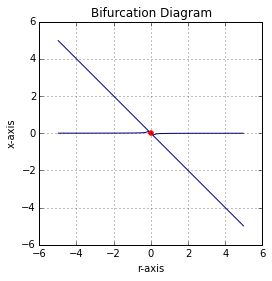

In [14]:
# set pairs of (x, r)
x = linspace(-5, 5, 50)
r = linspace(5, -5, 50)
x, r = meshgrid(x, r)

# Contour plot
contour(r, x, f2(x, r), [0])

# axis
grid(True)
axis("scaled")

# labels bifurcation points
plt.scatter([0], [0], s = 20, color = "red")

# labels and title
xlabel('r-axis')
ylabel('x-axis')
title('Bifurcation Diagram')

### 4. Vector Field & Contour Plot

According to the bifurcation diagram, here I draw the vector fields with r = -10, -5, 0, 5, 10 and contour plot with r = -10, -5, 0, 5, 10. The vector field is sketch on the x-t plane.

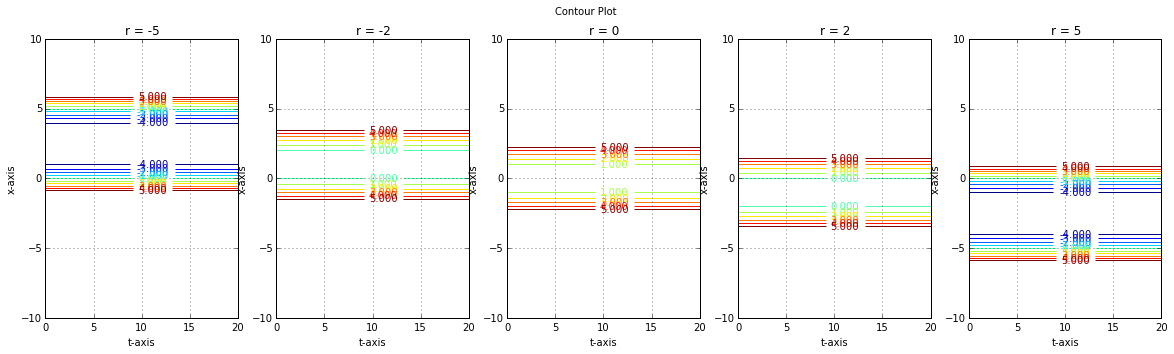

In [15]:
# set parameters
x = linspace(-10, 10, 2000)
t = linspace(0, 20, 10)
x, t = meshgrid(x, t)

r = [-5, -2, 0, 2, 5]


# contour plot
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax = ax.ravel()

for idx in range(5):
    # value of dx/dt
    xdot = f2(x, r[idx])

    # contour plot
    levels = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
    cs = ax[idx].contour(t, x, xdot, levels)
    clabel(cs,inline=1,fontsize=10)

    # axis
    ax[idx].grid(True)

    # labels
    ax[idx].set_xlabel('t-axis')
    ax[idx].set_ylabel('x-axis')
    ax[idx].set_title('r = ' + str(r[idx]))

# title
fig.text(0.5, 0.99, 'Contour Plot', horizontalalignment = 'center', verticalalignment = 'top')

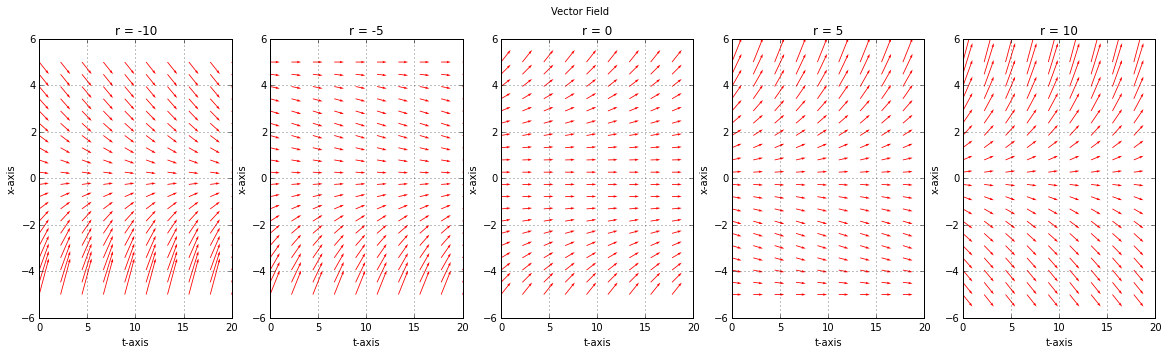

In [16]:
# set parameters
x = linspace(-5, 5, 20)
t = linspace(0, 20, 10)
x, t = meshgrid(x, t)

r = [-10, -5, 0, 5, 10]

# Vector Field
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax = ax.ravel()

for idx in range(5):    
    dx = f2(x, r[idx])
    dt = 20
    ax[idx].quiver(t, x, dt, dx, scale = 400, color = "r")

    # axis
    ax[idx].grid(True)

    # labels
    ax[idx].set_xlabel('t-axis')
    ax[idx].set_ylabel('x-axis')
    ax[idx].set_title('r = ' + str(r[idx]))

# title
fig.text(0.5, 0.99, 'Vector Field', horizontalalignment = 'center', verticalalignment = 'top')

# Pitchfolk Bifurcation

The final bifurcation in chapter 3 is called pitchfolk bifurcation. The equation below is from exercise 3.4.1.

### 1. Graph the ODE

The equation:  
$\dot x = rx + 4x^3$

In [17]:
# ODE
def f3(x, r):
    return r * x + 4 * x**3

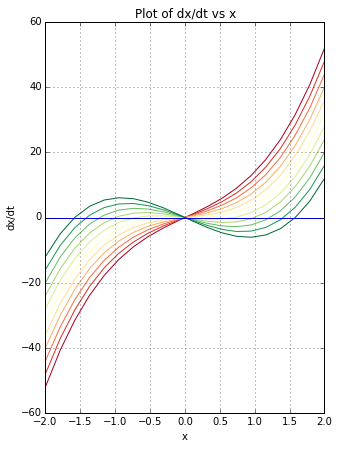

In [18]:
# sequence of x and r
x = linspace(-2, 2, 20)
r = linspace(10, -10, 11)

# line colors
bmap = brewer2mpl.get_map('RdYlGn', 'Diverging', 11)
colors = bmap.mpl_colors

# plot lines
figure(figsize=(5,7))
for idx in range(11):
    plt.plot(x, f3(x, r[idx]), color = colors[idx])

# axis
grid(True)
axhline()
xlabel("x")
ylabel("dx/dt")
title("Plot of dx/dt vs x")

Note that the color os lines represents the value of r. If the line is more reddish, it has larger r (r > 0) and if the line is more greenish, it has smaller r (where r < 0). The yellow line means that r is closed to zero.

### 2. Find the Bifurcation Points

From the graph above, it is obvious that when r is larger than zero (red line), there are only one fixed point at (0, 0). As r decreases and drops below zero, two more fixed points appear. Therefore, the bifurcation point should occur at r = 0.

In [19]:
x = sp.Symbol("x")
r = sp.Symbol("r")

Now, let's write down the equations.

$\begin{cases} \dot x = 0 \\ \frac{\dot x}{dx} = 0\end{cases} = \begin{cases} 4x^3 + rx = 0 \\ 12x^2 + r = 0\end{cases}$ 

In [20]:
sp.solve([r * x + 4 * x**3, r + 12 * x**2], x, r)

Indeed, the bifurcation occurs at r = 0, x = 0.

### 3. Bifurcation Diagram

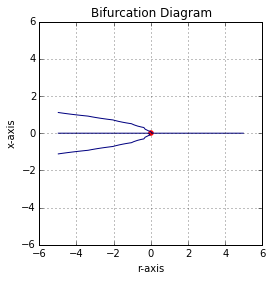

In [21]:
# set pairs of (x, r)
x = linspace(-5, 5, 50)
r = linspace(5, -5, 50)
x, r = meshgrid(x, r)

# Contour plot
contour(r, x, f3(x, r), [0])

# axis
grid(True)
axis("scaled")

# labels bifurcation points
plt.scatter([0], [0], s = 20, color = "red")

# labels and title
xlabel('r-axis')
ylabel('x-axis')
title('Bifurcation Diagram')

### 4. Vector Field & Contour Plot

According to the bifurcation diagram, here I draw the vector fields and contour plot with r = -4, 0, 4. The vector field is sketch on the x-t plane.

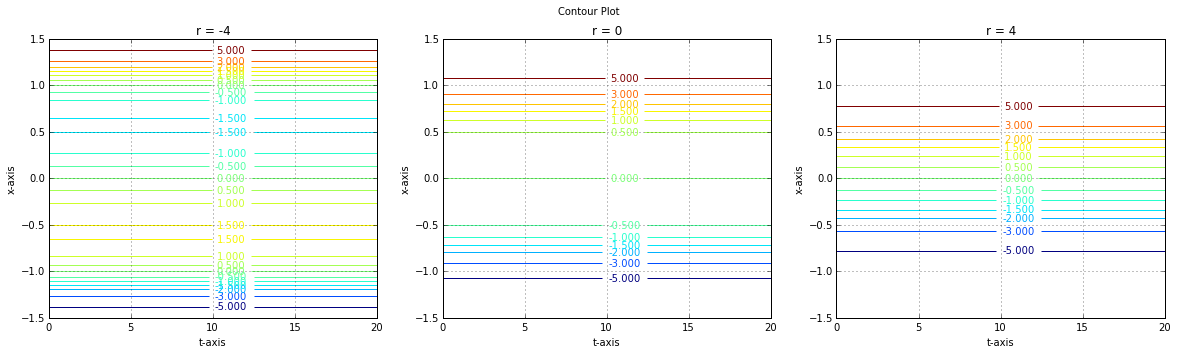

In [22]:
# set parameters
x = linspace(-1.5, 1.5, 10000)
t = linspace(0, 20, 10)
x, t = meshgrid(x, t)

r = [-4, 0, 4]


# contour plot
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.ravel()

for idx in range(3):
    # value of dx/dt
    xdot = f3(x, r[idx])

    # contour plot
    levels = [-5, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3, 5]
    cs = ax[idx].contour(t, x, xdot, levels)
    clabel(cs,inline=1,fontsize=10)

    # axis
    ax[idx].grid(True)

    # labels
    ax[idx].set_xlabel('t-axis')
    ax[idx].set_ylabel('x-axis')
    ax[idx].set_title('r = ' + str(r[idx]))

# title
fig.text(0.5, 0.99, 'Contour Plot', horizontalalignment = 'center', verticalalignment = 'top')

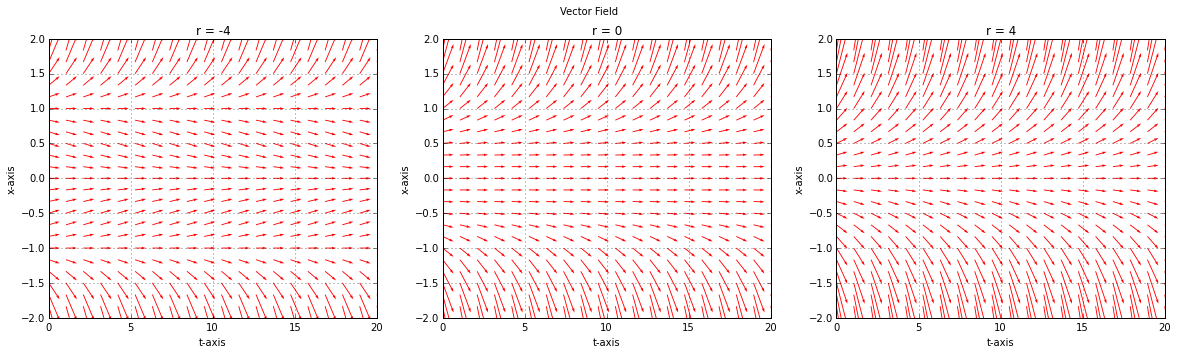

In [23]:
# set parameters
x = linspace(-2, 2, 25)
t = linspace(0, 20, 20)
x, t = meshgrid(x, t)

r = [-4, 0, 4]

# Vector Field
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.ravel()

for idx in range(3):    
    dx = f3(x, r[idx])
    dt = 5
    ax[idx].quiver(t, x, dt, dx, scale = 150, color = "r")

    # axis
    ax[idx].grid(True)

    # labels
    ax[idx].set_xlabel('t-axis')
    ax[idx].set_ylabel('x-axis')
    ax[idx].set_title('r = ' + str(r[idx]))

# title
fig.text(0.5, 0.99, 'Vector Field', horizontalalignment = 'center', verticalalignment = 'top')